In [1]:
#libraries for analysising and visualizing data
import pandas as pd
from datetime import datetime

#libraries for scrapping and cleaning the data
import requests
from bs4 import BeautifulSoup as bs
import re

#get the url
url = 'https://www.nairaland.com/home#featured'
scrapped_data = requests.get(url)
#Above we use the get method of the request library to request for the data we need from nairaland website.

#we use the .text method here instead of the .content method
nmember_age = scrapped_data.text
#To have a look at the data we just scrapped, let's print in out:
nmember_age


'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n"http://www.w3.org/TR/html4/loose.dtd"><html><head><title>Nairaland Forum</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><link href="https://www.nairaland.com/static/nl2.css/49134329965" rel="stylesheet" type="text/css"><link href="/feed" rel="alternate" type="application/rss+xml" title="Nairaland"><meta name="google-site-verification" content="KUABan1rWBhK3Jb2LePxHAv00FEbbM1wQMAAgsN-EyA"></head><body><div class="body"><table summary="" id=up><tr><td class=grad><h1><a href="https://www.nairaland.com/?" class=g title="Nairaland Nigerian Forum">₦airaland Forum</a></h1> Welcome, <b>Guest</b>: <a href="/register">Join Nairaland</a> / <b><a href="/login">LOGIN!</a></b> / <a href="/trending">Trending</a> / <a href="/recent">Recent</a> / <a href="/topics">New</a><br><b>Stats: </b>2,044,442 members, 4,386,992 topics. <b>Date</b>: Wednesday, 01 August 2018 at 01:31 PM<p><form action="/search"> <input typ

In [2]:
#To give the data a cleaner structure

soup = bs(nmember_age, 'lxml')
soup



<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head><title>Nairaland Forum</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><link href="https://www.nairaland.com/static/nl2.css/49134329965" rel="stylesheet" type="text/css"/><link href="/feed" rel="alternate" title="Nairaland" type="application/rss+xml"/><meta content="KUABan1rWBhK3Jb2LePxHAv00FEbbM1wQMAAgsN-EyA" name="google-site-verification"/></head><body><div class="body"><table id="up" summary=""><tr><td class="grad"><h1><a class="g" href="https://www.nairaland.com/?" title="Nairaland Nigerian Forum">₦airaland Forum</a></h1> Welcome, <b>Guest</b>: <a href="/register">Join Nairaland</a> / <b><a href="/login">LOGIN!</a></b> / <a href="/trending">Trending</a> / <a href="/recent">Recent</a> / <a href="/topics">New</a><br/><b>Stats: </b>2,044,442 members, 4,386,992 topics. <b>Date</b>: Wednesday, 01 August 2018 at 01:31 PM<p></p><form action="/searc

In [3]:
#bringing out the part we only need, which is the birthday of nairaland users
#Note: If you inspect the html of the Birthday list, you should see that it is 
#contained in a cell of table tag (< td > ......... < /td >).

soup('td')

[<td class="grad"><h1><a class="g" href="https://www.nairaland.com/?" title="Nairaland Nigerian Forum">₦airaland Forum</a></h1> Welcome, <b>Guest</b>: <a href="/register">Join Nairaland</a> / <b><a href="/login">LOGIN!</a></b> / <a href="/trending">Trending</a> / <a href="/recent">Recent</a> / <a href="/topics">New</a><br/><b>Stats: </b>2,044,442 members, 4,386,992 topics. <b>Date</b>: Wednesday, 01 August 2018 at 01:31 PM<p></p><form action="/search"> <input name="q" size="32" type="text"/>
 <input name="search" type="submit" value="Search"/></form> </td>,
 <td class="l w"><a href="/nairaland" title=" class=g"><b>Nairaland / General</b></a>: <a href="/politics" title="Our country Nigeria is the giant of Africa!"><b>Politics</b></a>, <a href="/crime" title=""><b>Crime</b></a>, <a href="/romance" title="Discuss dating, courtship, and romance in marriage."><b>Romance</b></a>, <a href="/jobs" title="Job/Employment Opportunities; Vacancies In Nigeria!"><b>Jobs/Vacancies</b></a>, <a href="/

In [4]:
# lets read out the text only ignoring the tag cells above i.e words found inbeteween the tag
for data in soup('td'):
    print (data.text)

₦airaland Forum Welcome, Guest: Join Nairaland / LOGIN! / Trending / Recent / NewStats: 2,044,442 members, 4,386,992 topics. Date: Wednesday, 01 August 2018 at 01:31 PM 
 
Nairaland / General: Politics, Crime, Romance, Jobs/Vacancies, Career, Business, Investment, NYSC, Education, Autos, Car Talk, Properties, Health, Travel, Family, Culture, Religion, Food, Diaries, Nairaland Ads, Pets, Agriculture
Entertainment: Jokes Etc, TV/Movies, Music/Radio, Celebrities, Fashion, Events, Sports, Gaming, Forum Games, Literature
Science/Technology: Programming, Webmasters, Computers, Phones, Art, Graphics & Video, Technology Market
 Featured Links / Twitter  / Facebook  / How To Advertise 
 » Actress Uche Ogbodo Stuns In Traditional Outfit «» Woman Got Burnt After Gas Cylinder Exploded While Using Her Phone (Graphic Photos) «» "Ibrahimovic's Departure Buried Italian League - Ronaldo Turns It To Heaven" «» Latest Job Openings At FHI360 Nigeria (4 Positions) «» "How Can I Secure My USSD Banking?" «» 

In [5]:
# Obviously, we don't need every text above. So we use the 're' module, to extract only the relevant birthday list

# Note: I will ignore those members whose ages are not displayed, so that we don't have to deal with NaN values in our data


member_found = None

re_match = "[\w]+\([\d]+\)" # any word count+1 followed-by '(' followed-by any number count+1 followed-by ')'

for data in soup('td'):
    data_found = re.findall(re_match, data.text)
    
    if data_found:
        member_found = data_found

print (member_found)

['samfex(38)', 'Igunnu(35)', 'hancock(68)', 'ajisogun(27)', 'Dospix(27)', 'bayour02(30)', 'shamecurls(58)', 'latbas(26)', 'johnteey(24)', 'urch999(34)', 'umuoshe(37)', 'webnerd(34)', 'olayiwolar1(28)', 'jemmy10(28)', 'ekwurekwu(31)', 'AbdulMajeed2(23)', 'Luvdmx(34)', 'ekeneobih(26)', 'boxymccoy(32)', 'Ajayimichael(28)', 'IamAthens(28)', 'seun4peace2015(34)', 'queezer(31)', 'Franky9584(28)', 'austinslimzy(34)', 'WhoDeyThere(30)', 'GCFR696(30)', 'kaybee4047(28)', 'Swiftboy(30)', 'Ellatyra(26)', 'Abiola1531(24)', 'nicetboy(31)', 'grayht(33)', 'Edygrin(24)', 'jiboladhino(29)', 'Cardeezah(27)', 'Donjcco(24)', 'slydv(31)', 'donteanz(22)', 'faithugo64(21)', 'samosky26(20)', 'wiseman2392(40)', 'brainbox2014(30)', 'zenith4biz(28)', 'KGBEAST(21)', 'Newerakings(31)', 'mightyrocket(31)', 'MbaanabaraAgu(34)', 'TOSSYN38(24)', 'austinomalatus(28)', 'geobukky(26)', 'aciza(34)', 'Essquare(29)', 'pointstores(40)', 'kabirjimoh(26)', 'phemflex90(27)', 'jerrymichaels(33)', 'chilakapeter(48)', 'delzbaba(38)

In [6]:
# Lets further clean up the list to seperate Usernames from age
# Use list comprehension to replace the last brace ")" with empty "" in member_found above

member_found_replaced = [x.replace(")", "") for x in member_found]            # replaces ")" by ""
print (member_found_replaced)

['samfex(38', 'Igunnu(35', 'hancock(68', 'ajisogun(27', 'Dospix(27', 'bayour02(30', 'shamecurls(58', 'latbas(26', 'johnteey(24', 'urch999(34', 'umuoshe(37', 'webnerd(34', 'olayiwolar1(28', 'jemmy10(28', 'ekwurekwu(31', 'AbdulMajeed2(23', 'Luvdmx(34', 'ekeneobih(26', 'boxymccoy(32', 'Ajayimichael(28', 'IamAthens(28', 'seun4peace2015(34', 'queezer(31', 'Franky9584(28', 'austinslimzy(34', 'WhoDeyThere(30', 'GCFR696(30', 'kaybee4047(28', 'Swiftboy(30', 'Ellatyra(26', 'Abiola1531(24', 'nicetboy(31', 'grayht(33', 'Edygrin(24', 'jiboladhino(29', 'Cardeezah(27', 'Donjcco(24', 'slydv(31', 'donteanz(22', 'faithugo64(21', 'samosky26(20', 'wiseman2392(40', 'brainbox2014(30', 'zenith4biz(28', 'KGBEAST(21', 'Newerakings(31', 'mightyrocket(31', 'MbaanabaraAgu(34', 'TOSSYN38(24', 'austinomalatus(28', 'geobukky(26', 'aciza(34', 'Essquare(29', 'pointstores(40', 'kabirjimoh(26', 'phemflex90(27', 'jerrymichaels(33', 'chilakapeter(48', 'delzbaba(38', 'irapada001(28', 'chrismago(28', 'Cornerstone199(27', 'a

In [7]:
# Now split "member_found_replaced" based on '(' between the usernames and age
# we use for loop to loop through each item of the "member_found_replaced" list above

for y in member_found_replaced:
    member_cleaned = y.split("(")
    print (member_cleaned)
    
# what we have "member_cleaned" is individual list with two elements each
# lets combine all the lists into a dictionary

['samfex', '38']
['Igunnu', '35']
['hancock', '68']
['ajisogun', '27']
['Dospix', '27']
['bayour02', '30']
['shamecurls', '58']
['latbas', '26']
['johnteey', '24']
['urch999', '34']
['umuoshe', '37']
['webnerd', '34']
['olayiwolar1', '28']
['jemmy10', '28']
['ekwurekwu', '31']
['AbdulMajeed2', '23']
['Luvdmx', '34']
['ekeneobih', '26']
['boxymccoy', '32']
['Ajayimichael', '28']
['IamAthens', '28']
['seun4peace2015', '34']
['queezer', '31']
['Franky9584', '28']
['austinslimzy', '34']
['WhoDeyThere', '30']
['GCFR696', '30']
['kaybee4047', '28']
['Swiftboy', '30']
['Ellatyra', '26']
['Abiola1531', '24']
['nicetboy', '31']
['grayht', '33']
['Edygrin', '24']
['jiboladhino', '29']
['Cardeezah', '27']
['Donjcco', '24']
['slydv', '31']
['donteanz', '22']
['faithugo64', '21']
['samosky26', '20']
['wiseman2392', '40']
['brainbox2014', '30']
['zenith4biz', '28']
['KGBEAST', '21']
['Newerakings', '31']
['mightyrocket', '31']
['MbaanabaraAgu', '34']
['TOSSYN38', '24']
['austinomalatus', '28']
['geo

In [8]:
# we first declare "member_cleaned" as empty dictiory, so that we can append individaul list above into it

member_cleaned = {}

for y in member_found_replaced:
    temp_data = y.split("(")
    
    member_cleaned[temp_data[0]] = int(temp_data[1])
    
print (member_cleaned)

{'samfex': 38, 'Igunnu': 35, 'hancock': 68, 'ajisogun': 27, 'Dospix': 27, 'bayour02': 30, 'shamecurls': 58, 'latbas': 26, 'johnteey': 24, 'urch999': 34, 'umuoshe': 37, 'webnerd': 34, 'olayiwolar1': 28, 'jemmy10': 28, 'ekwurekwu': 31, 'AbdulMajeed2': 23, 'Luvdmx': 34, 'ekeneobih': 26, 'boxymccoy': 32, 'Ajayimichael': 28, 'IamAthens': 28, 'seun4peace2015': 34, 'queezer': 31, 'Franky9584': 28, 'austinslimzy': 34, 'WhoDeyThere': 30, 'GCFR696': 30, 'kaybee4047': 28, 'Swiftboy': 30, 'Ellatyra': 26, 'Abiola1531': 24, 'nicetboy': 31, 'grayht': 33, 'Edygrin': 24, 'jiboladhino': 29, 'Cardeezah': 27, 'Donjcco': 24, 'slydv': 31, 'donteanz': 22, 'faithugo64': 21, 'samosky26': 20, 'wiseman2392': 40, 'brainbox2014': 30, 'zenith4biz': 28, 'KGBEAST': 21, 'Newerakings': 31, 'mightyrocket': 31, 'MbaanabaraAgu': 34, 'TOSSYN38': 24, 'austinomalatus': 28, 'geobukky': 26, 'aciza': 34, 'Essquare': 29, 'pointstores': 40, 'kabirjimoh': 26, 'phemflex90': 27, 'jerrymichaels': 33, 'chilakapeter': 48, 'delzbaba': 3

In [9]:
# covert the dictionary "member_cleaned" above into a Pandas DataFrame
# Note: in python 3, we have to convert the dictionary items into a list to work with Pandas DataFrame


# define the column names
columns_name = ["Username", "Age"]

# df = pd.DataFrame(member_cleaned.items(), columns = columns_name )   # this is for python 2
nairalanduser = pd.DataFrame(list(member_cleaned.items()), columns = columns_name )

nairalanduser

,Username,Age
0,samfex,38
1,Igunnu,35
2,hancock,68
3,ajisogun,27
4,Dospix,27
5,bayour02,30
6,shamecurls,58
7,latbas,26
8,johnteey,24
9,urch999,34


In [10]:
# Lets add a column for today's date

# using the datetime module


todays_date = datetime.now().date()

nairalanduser["Date"] = todays_date

nairalanduser

,Username,Age,Date
0,samfex,38,2018-08-01
1,Igunnu,35,2018-08-01
2,hancock,68,2018-08-01
3,ajisogun,27,2018-08-01
4,Dospix,27,2018-08-01
5,bayour02,30,2018-08-01
6,shamecurls,58,2018-08-01
7,latbas,26,2018-08-01
8,johnteey,24,2018-08-01
9,urch999,34,2018-08-01


In [11]:
# Let save the dataframe into csv file
# we name the csv file with the current date, i.e: 14/08/2016 will be 20160814 for the file name

nairalanduser.to_csv('nairalanduser.csv')

To Analyze and Visualize our data, below are some of the questions we are going to answer:-

a) How many members are celebrating their birthdays today?

b) Who is the oldest and youngest member celebrating his/her birthdays today?

c) What is the average age the celebrants?

d) How old will each celebrant be in 10years?

e) How old was each celebrant when NairaLand was established?

In [12]:
# Checking the statistical summary of the age column
#ANSWER A: 116 from the data below
#ANSWER C: 28.69 from the data below
nairalanduser.describe()


,Age
count,116.000000
mean,28.698276
std,7.270213
min,17.000000
25%,24.000000
50%,28.000000
75%,31.000000
max,68.000000


In [13]:
#ANSWER B: Oldest member celebrating today 1/8/2018
nairalanduser.sort_values(by="Age", ascending=False)[:10]

,Username,Age,Date
2,hancock,68,2018-08-01
6,shamecurls,58,2018-08-01
70,Bigboss111,48,2018-08-01
57,chilakapeter,48,2018-08-01
41,wiseman2392,40,2018-08-01
53,pointstores,40,2018-08-01
0,samfex,38,2018-08-01
94,BabaAgba79,38,2018-08-01
58,delzbaba,38,2018-08-01
10,umuoshe,37,2018-08-01


In [14]:
#ANSWER B2: Youngest member celebrating today 1/8/2018
nairalanduser.sort_values(by="Age", ascending=True)[:10]

,Username,Age,Date
101,Bullet99,17,2018-08-01
69,harlehleh,18,2018-08-01
83,ChucE,18,2018-08-01
76,Brazzaville,19,2018-08-01
107,callmeVIBRANT,19,2018-08-01
111,Augustine112,19,2018-08-01
78,Euclidean,19,2018-08-01
98,Wetechshout,19,2018-08-01
40,samosky26,20,2018-08-01
113,gerrard305,20,2018-08-01


In [15]:
#ANSWER D: How old will each celebrant be in 10years?

nairalanduser["Age_in_10yrs"] = nairalanduser["Age"] + 10

nairalanduser

,Username,Age,Date,Age_in_10yrs
0,samfex,38,2018-08-01,48
1,Igunnu,35,2018-08-01,45
2,hancock,68,2018-08-01,78
3,ajisogun,27,2018-08-01,37
4,Dospix,27,2018-08-01,37
5,bayour02,30,2018-08-01,40
6,shamecurls,58,2018-08-01,68
7,latbas,26,2018-08-01,36
8,johnteey,24,2018-08-01,34
9,urch999,34,2018-08-01,44


In [16]:
#ANSWER E: Nairaland was created in 2005
# age at 2005 when NairaLand was established
nairalanduser["Age_at_2005"] = nairalanduser["Age"] - 13

nairalanduser

,Username,Age,Date,Age_in_10yrs,Age_at_2005
0,samfex,38,2018-08-01,48,25
1,Igunnu,35,2018-08-01,45,22
2,hancock,68,2018-08-01,78,55
3,ajisogun,27,2018-08-01,37,14
4,Dospix,27,2018-08-01,37,14
5,bayour02,30,2018-08-01,40,17
6,shamecurls,58,2018-08-01,68,45
7,latbas,26,2018-08-01,36,13
8,johnteey,24,2018-08-01,34,11
9,urch999,34,2018-08-01,44,21


**PLOTTING GRAPH**

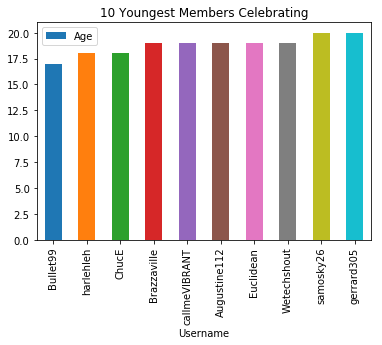

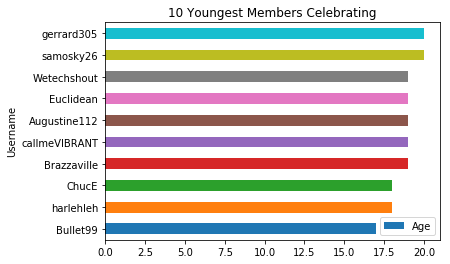

In [17]:
# First 10 youngest members celebrating

youngest_10 = nairalanduser.sort_values(by="Age", ascending=True)[:10]
# To display the plot within the Jupyter notebook
%matplotlib inline

youngest_10.plot(x="Username", y="Age", kind="bar", title="10 Youngest Members Celebrating")

youngest_10.plot(x="Username", y="Age", kind="barh", title="10 Youngest Members Celebrating") #Horizontal BarChat

In [18]:
#Lets calculate the percentage of the First 10 youngest members celebrants, so we can plot pie chat with it
youngest_10

,Username,Age,Date,Age_in_10yrs,Age_at_2005
101,Bullet99,17,2018-08-01,27,4
69,harlehleh,18,2018-08-01,28,5
83,ChucE,18,2018-08-01,28,5
76,Brazzaville,19,2018-08-01,29,6
107,callmeVIBRANT,19,2018-08-01,29,6
111,Augustine112,19,2018-08-01,29,6
78,Euclidean,19,2018-08-01,29,6
98,Wetechshout,19,2018-08-01,29,6
40,samosky26,20,2018-08-01,30,7
113,gerrard305,20,2018-08-01,30,7


In [19]:
# Lets find the sum of the ages

sum_youngest_10 = youngest_10["Age"].sum()

sum_youngest_10

188

In [20]:
# Lets find the percentage of each first 10 youngest members and save it in a new column "Percentage"

youngest_10["Percentage"] = (youngest_10["Age"] * 100) / (sum_youngest_10)

# Nowlets check the new dataframe first 10 youngest members

youngest_10

,Username,Age,Date,Age_in_10yrs,Age_at_2005,Percentage
101,Bullet99,17,2018-08-01,27,4,9.042553
69,harlehleh,18,2018-08-01,28,5,9.574468
83,ChucE,18,2018-08-01,28,5,9.574468
76,Brazzaville,19,2018-08-01,29,6,10.106383
107,callmeVIBRANT,19,2018-08-01,29,6,10.106383
111,Augustine112,19,2018-08-01,29,6,10.106383
78,Euclidean,19,2018-08-01,29,6,10.106383
98,Wetechshout,19,2018-08-01,29,6,10.106383
40,samosky26,20,2018-08-01,30,7,10.638298
113,gerrard305,20,2018-08-01,30,7,10.638298


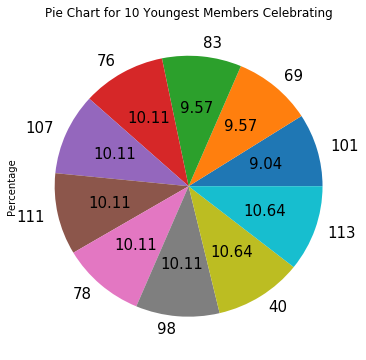

In [21]:
# to plot the pie chat of the Percentage column above

youngest_10["Percentage"].plot.pie(autopct='%.2f', fontsize=15, figsize=(6, 6), title="Pie Chart for 10 Youngest Members Celebrating")

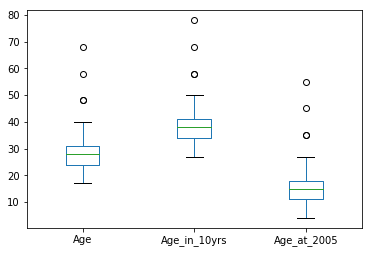

In [22]:
# box plot on df for the three columns, if there are outliers you will see them
"""In statistics, an outlier is an observation point that is distant from other observations.
An outlier may be due to variability in the measurement or it may indicate experimental error; 
the latter are sometimes excluded from the data set."""

nairalanduser.plot.box()

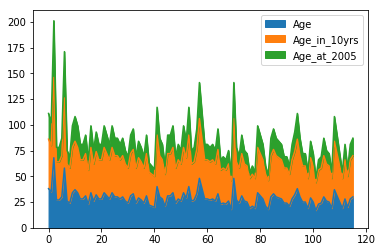

In [23]:
# Area plot, just to compare the three colums
nairalanduser.plot.area()

**REFERENCES**

https://pandas.pydata.org/pandas-docs/stable/index.html

https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/

https://first-web-scraper.readthedocs.io/en/latest/

https://docs.python-guide.org/scenarios/scrape/

**#Using SEABORN FOR DATA VISUALIZATION**
#Always use the pd.read format to read in the data.
#using the sns.load_dataset might give http error.


In [24]:
import pandas as pd
import seaborn as sns
%matplotlib inline
nairalanduser = pd.read_csv('nairalanduser.csv')
nairalanduser

,Unnamed: 0,Username,Age,Date
0,0,samfex,38,2018-08-01
1,1,Igunnu,35,2018-08-01
2,2,hancock,68,2018-08-01
3,3,ajisogun,27,2018-08-01
4,4,Dospix,27,2018-08-01
5,5,bayour02,30,2018-08-01
6,6,shamecurls,58,2018-08-01
7,7,latbas,26,2018-08-01
8,8,johnteey,24,2018-08-01
9,9,urch999,34,2018-08-01


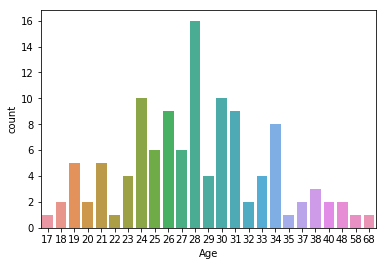

In [25]:
#COUNTPLOT
sns.countplot(x='Age', data=nairalanduser)

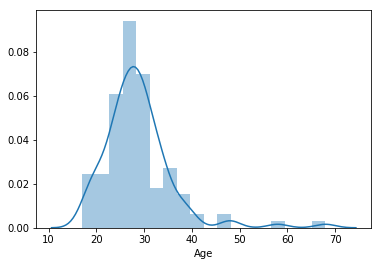

In [26]:
#DISTRIBUTIONPLOT
sns.distplot(nairalanduser['Age'])

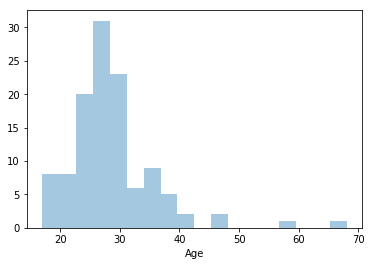

In [27]:
#To remove the Kernel Density Estimator i.e, the line above

sns.distplot(nairalanduser['Age'],kde=False)

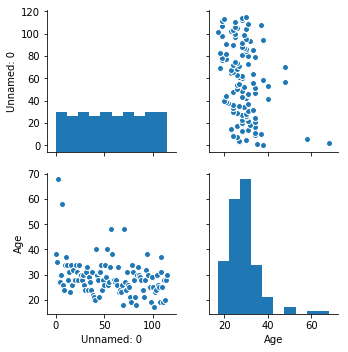

In [28]:
#PAIRPLOT
sns.pairplot(nairalanduser)

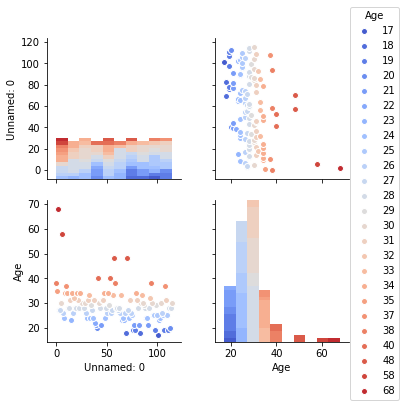

In [29]:
#PAIRPLOT COLOURATION
sns.pairplot(nairalanduser, hue='Age',palette='coolwarm')

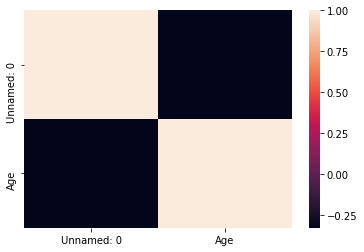

In [30]:
#HEATMAPS
cor_matrix = nairalanduser.corr( )
sns.heatmap(cor_matrix)

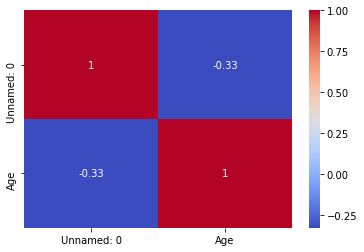

In [31]:
#COLOURING HEATMAP
sns.heatmap(nairalanduser.corr(),cmap='coolwarm',annot=True)